In [7]:
import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from networkx.algorithms.community import girvan_newman
from community import best_partition

In [8]:
def getColors():
  return np.array([
          [166,206,227],
          [31,120,180],
          [178,223,138],
          [51,160,44],
          [251,154,153],
          [227,26,28],
          [253,191,111],
          [255,127,0],
          [202,178,214],
          [106,61,154],
          [255,255,153],
          [177,89,40]
        ])/255

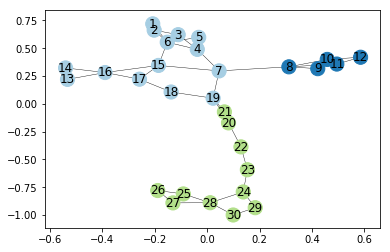

In [19]:
fileName = "output_3layer_1.txt"
A = pd.read_csv(fileName, sep=" ", header=None)
G = nx.from_numpy_matrix(np.array(A))

colors = getColors()
# layouts = {nx.spring_layout : 'spring', 
#            nx.circular_layout : 'x_circular', 
#            nx.kamada_kawai_layout : 'kamada_kawai'}

layouts = {nx.spring_layout : 'kamada_kawai'}

partition = best_partition(G)
communityCount = max(partition.values())

comms = girvan_newman(G)

community = None
for comm in comms:
  if len(comm) == communityCount:
    community = comm
    break

for fun in layouts:
    plt.clf()
    outfile = fileName.split('.')[0] + '_best_partition_' + layouts[fun] + '.png'
    pos = fun(G)
    count = 0
    
    for com in community:
      toDraw = True
      list_nodes = list(com)
      labels = dict()
      
      for node in list_nodes:
        labels[node] = node+1
      node_colors = np.zeros((len(list_nodes), 3))
      if len(list_nodes) == 1:
        node_colors[:] = [1, 1, 1]
        if fun != nx.circular_layout:
          toDraw = False
      else:
        node_colors[:] = colors[count]
        count += 1
      if toDraw:
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 200, node_color=node_colors)
        nx.draw_networkx_labels(G, pos, labels)
    nx.draw_networkx_edges(G, pos, width=0.4)
#     plt.savefig(outfile, dpi=300)

In [6]:
?best_partition

In [41]:
list(community[0])

[0, 1, 2, 3, 4, 5]